<a href="https://colab.research.google.com/github/SadbinShakil/Nationality-Prediction/blob/master/Prediction_Nationality_By_Names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load DataFrames

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import All the packages we need

In [ ]:
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from gensim.models import Word2Vec
    import warnings 
    warnings.filterwarnings(action = 'ignore') 

## Importing Dataset

In [ ]:
data_frame = pd.read_csv("names_data.csv",encoding= 'unicode_escape')
data_frame.head()


,names,nationality
0,Gershon,yiddish
1,Lantz,yiddish
2,Zaide,yiddish
3,Zalman,yiddish
4,Zindel,yiddish


In [ ]:
data_frame

,names,nationality
0,Gershon,yiddish
1,Lantz,yiddish
2,Zaide,yiddish
3,Zalman,yiddish
4,Zindel,yiddish
...,...,...
3882,Vidura,Thai
3883,Waan,Thai
3884,Waen,Thai
3885,Yod Rak,Thai


In [ ]:
pip install frac


Note: you may need to restart the kernel to use updated packages.


## SHuffle the dataset

In [ ]:
data_frame=data_frame.sample(frac=1).reset_index(drop=True)
data_frame

,names,nationality
0,Archimedes,greek
1,Haidar,Indonesian
2,Egor,russian
3,Calvin,latin
4,Valborg,swedish
...,...,...
3882,Kane,Filipino
3883,Buppha,Thai
3884,Remedy,Filipino
3885,Banagher,irish


## Check how much columns we have

In [ ]:
data_frame.columns

Index(['names', 'nationality'], dtype='object')

## Lets see our Nationality typs

In [ ]:
data_frame['nationality'].unique()

array(['greek', 'Indonesian', 'russian', 'latin', 'swedish',
       'native-american', 'german', 'yiddish', 'japanese',
       'african-american', 'Thai', 'Mongolian', 'celtic', 'hebrew',
       'Pakistani', 'welsh', 'arabic', 'irish', 'hindi', 'italian',
       'vietnamese', 'Cambodian', 'polish', 'hungarian', 'african',
       'scandinavian', 'american', 'teutonic', 'armenian', 'old-english',
       'hawaiian', 'gaelic', 'chinese', 'slavic', 'norse', 'Filipino',
       'turkish', 'indian', 'middle-english', 'old-french', 'old-german',
       'Nepal', 'scottish', 'spanish', 'sanskrit', 'french', 'swahili',
       'english', 'egyptian', 'Bhutan', 'Myanmar', 'polynesian', 'dutch',
       'Bangladeshi', 'persian', 'czechoslovakian', 'korean',
       'Cambodian ', 'old-norse', 'finnish', 'danish', 'Filipino '],
      dtype=object)

## Counting How many Nationality_type We have

In [ ]:
Nationality_type=['old-german', 'native-american', 'scottish', 'persian',
       'Indonesian', 'egyptian', 'old-french', 'french', 'irish',
       'american', 'chinese', 'swedish', 'old-english', 'japanese',
       'english', 'Pakistani', 'german', 'turkish', 'Mongolian', 'Thai',
       'celtic', 'arabic', 'Cambodian', 'gaelic', 'vietnamese', 'spanish',
       'Filipino', 'hawaiian', 'Nepal', 'african-american',
       'scandinavian', 'latin', 'slavic', 'polish', 'Bhutan', 'welsh',
       'sanskrit', 'indian', 'hungarian', 'hindi', 'russian', 'african',
       'Bangladeshi', 'italian', 'hebrew', 'middle-english', 'danish',
       'polynesian', 'dutch', 'norse', 'teutonic', 'korean', 'greek',
       'finnish', 'czechoslovakian', 'old-norse', 'swahili', 'yiddish',
       'Myanmar', 'armenian', 'Cambodian ', 'Filipino ']

In [ ]:
len(Nationality_type)

62

## lets see the number of names we have in every nationality type

In [ ]:
data_frame.groupby('nationality')['names'].count()


nationality
Bangladeshi     30
Bhutan          13
Cambodian       97
Cambodian        5
Filipino       166
              ... 
teutonic        32
turkish         52
vietnamese      52
welsh           91
yiddish         11
Name: names, Length: 62, dtype: int64

## Showing them graphically

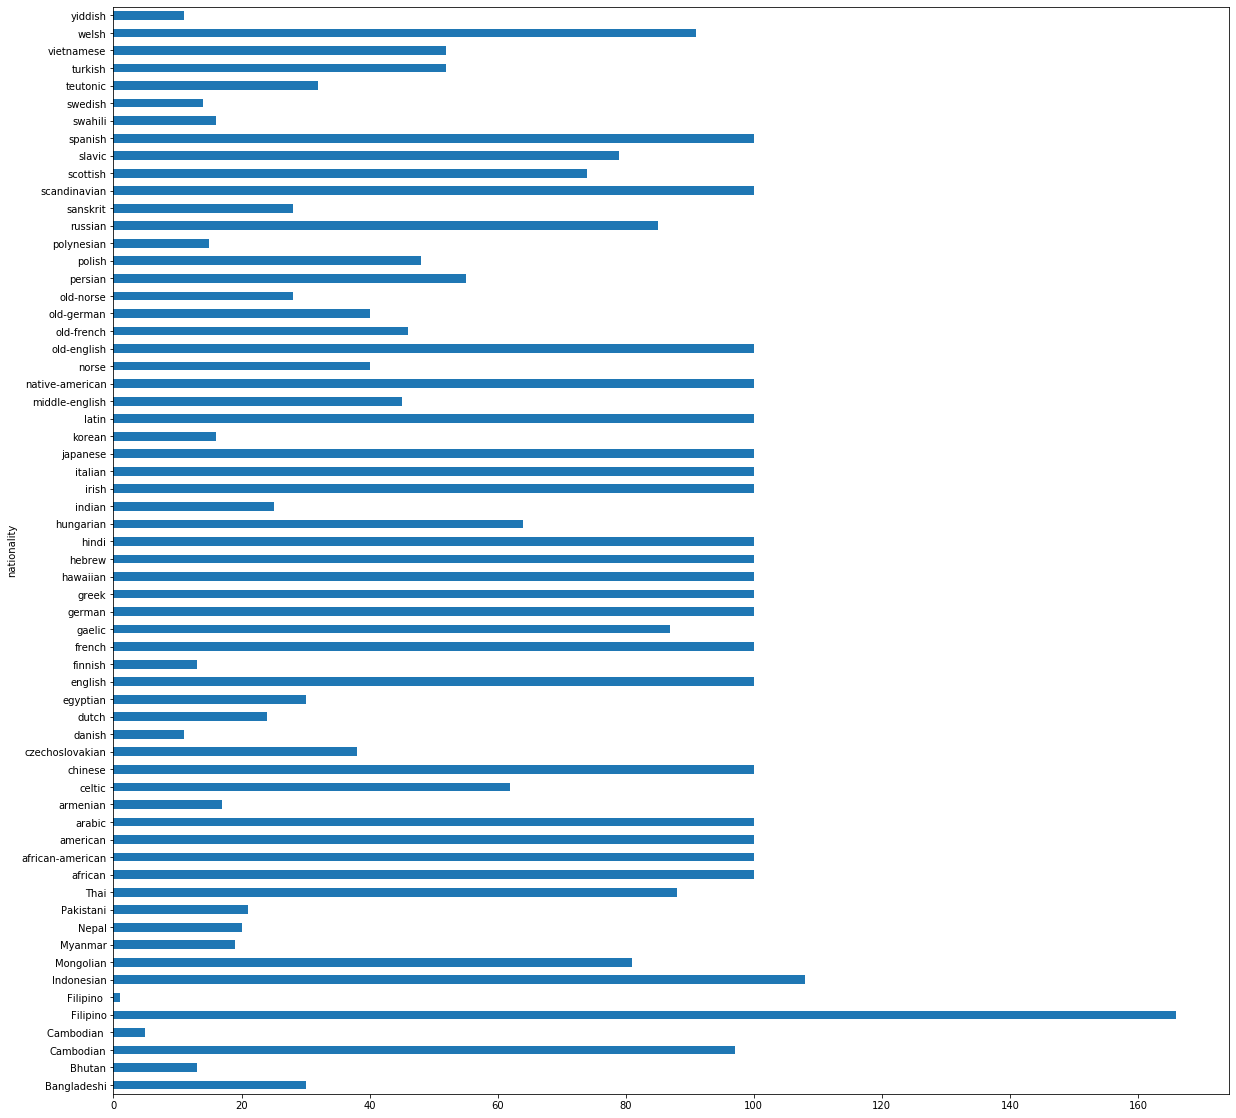

In [ ]:
data_frame.groupby('nationality')['names'].count().plot(kind='barh',figsize=(20,20))


## Features selections

In [ ]:
Xfeatures=data_frame['names']
Ylabels=data_frame['nationality']

In [ ]:

cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

NameError: ignored

In [ ]:
print(X.shape)
X

In [ ]:
cv.get_feature_names()

## Spliting Dataset

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(X,Ylabels,test_size=0.30,random_state=42)

## Building First Naive bayes Model

In [ ]:
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Check the Accuracy of Our Model

In [ ]:
result=nv.score(x_test,y_test)
print(result)


0.07883461868037704


In [ ]:
print("our Accuracy is",result*100,"%")

our Accuracy is 7.883461868037704 %


## From this model, lets try to predict something

In [ ]:

sample1 = ["Kofi"]
vect1 = cv.transform(sample1).toarray()

In [ ]:
nv.predict(vect1)


array(['african-american'], dtype='<U16')

## Lets see its right or wrong

In [ ]:
records = data_frame.loc[data_frame['names'] =='Shakil']

In [ ]:
display(records)

,names,nationality
3183,Shakil,Bangladeshi


## so its predicting the right nationality

## Lets Predict Something more


In [ ]:
sample2 = ["Kofi", "Zaide ", "Virsila ", " Zelenka"]
vect2 = cv.transform(sample2).toarray()

In [ ]:
nv.predict(vect2)

array(['african-american', 'Filipino', 'Filipino', 'Filipino'],
      dtype='<U16')

## Lets see its right or wrong


In [ ]:
records1 = data_frame.loc[data_frame['names'] == "Kofi"]
records2 = data_frame.loc[data_frame['names'] == "Zaide"]
records3 = data_frame.loc[data_frame['names'] == "Virsila"]
records4 = data_frame.loc[data_frame['names'] == "Zelenka"]
                          

In [ ]:
records1

,names,nationality
1281,Kofi,african
2004,Kofi,african-american


In [ ]:
records2

,names,nationality
529,Zaide,yiddish


In [ ]:
records3

,names,nationality
1150,Virsila,czechoslovakian


In [ ]:
records4

,names,nationality
2226,Zelenka,czechoslovakian


## SO its not predicting that much good as expected

In [ ]:
sample5 = ["barsha"]
vect5 = cv.transform(sample5).toarray()


In [ ]:
nv.predict(vect5)

array(['Filipino'], dtype='<U16')

## As naive bayes isn't working that good, Apply some other Algorithms


In [ ]:
from sklearn.linear_model import LogisticRegression

## Lets try Logistic regression

In [ ]:
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
result2=logit.score(x_test,y_test)

In [ ]:
print("our Accuracy is",result2*100,"%")

our Accuracy is 8.226221079691516 %


In [ ]:
logit.predict(vect1)

array(['african-american'], dtype=object)

In [ ]:
logit.predict(vect2)

array(['african-american', 'Filipino', 'Filipino', 'Filipino'],
      dtype=object)

In [ ]:
sample_3 = ["katya","natasha"]

In [ ]:
vect3 = cv.transform(sample_3).toarray()

In [ ]:
logit.predict(vect3)


array(['Filipino', 'Filipino'], dtype=object)

## Trying eli5 for showing top features related to all country and also the predicted top features

In [ ]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import eli5

In [ ]:
# Show the weights
eli5.show_weights(logit,target_names=Nationality_type )

In [ ]:
feature_names = cv.get_feature_names()

In [ ]:
eli5.show_weights(logit,feature_names=feature_names,target_names=Nationality_type )

In [ ]:
ex = np.reshape(vect1,-1,1)

## seeing explainations of this

In [ ]:
print(eli5.format_as_text(eli5.explain_weights(logit,ex,target_names=Nationality_type,feature_names=feature_names)))

Explained as: linear model

Features with largest coefficients per class.
Caveats:
1. Be careful with features which are not
   independent - weights don't show their importance.
2. If scale of input features is different then scale of coefficients
   will also be different, making direct comparison between coefficient values
   incorrect.
3. Depending on regularization, rare features sometimes may have high
   coefficients; this doesn't mean they contribute much to the
   classification result for most examples.

y='old-german' top features
Weight  Feature 
------  --------
+0.975  rifah   
+0.975  rohan   
+0.975  naomi   
+0.975  namrata 
+0.975  sadia   
+0.975  mohammad
+0.975  emu     
+0.975  mashrar 
+0.975  mahir   
+0.975  fardin  
+0.975  barsha  
+0.975  shourav 
+0.975  simanto 
+0.975  aysha   
+0.975  syeda   
+0.975  ashik   
+0.975  abir    
+0.975  rafi    
+0.975  fahim   
… 2 more positive …
… 2560 more negative …
-4.656  <BIAS>  

y='native-american' top features
W

## Single Pred Explanation with Eli5

## See the real nationality and compare with the weights

In [ ]:
data_frame.loc[data_frame['names'] == 'Kofi']

,names,nationality
1281,Kofi,african
2004,Kofi,african-american


## See the weights and explaination

In [ ]:
ex = np.reshape(vect1,-1,1)

In [ ]:
eli5.show_prediction(logit,ex,target_names=Nationality_type,feature_names=feature_names)

In [ ]:
print(eli5.format_as_text(eli5.explain_weights(logit,ex,target_names=Nationality_type,feature_names=feature_names)))

Explained as: linear model

Features with largest coefficients per class.
Caveats:
1. Be careful with features which are not
   independent - weights don't show their importance.
2. If scale of input features is different then scale of coefficients
   will also be different, making direct comparison between coefficient values
   incorrect.
3. Depending on regularization, rare features sometimes may have high
   coefficients; this doesn't mean they contribute much to the
   classification result for most examples.

y='old-german' top features
Weight  Feature 
------  --------
+0.975  rifah   
+0.975  rohan   
+0.975  naomi   
+0.975  namrata 
+0.975  sadia   
+0.975  mohammad
+0.975  emu     
+0.975  mashrar 
+0.975  mahir   
+0.975  fardin  
+0.975  barsha  
+0.975  shourav 
+0.975  simanto 
+0.975  aysha   
+0.975  syeda   
+0.975  ashik   
+0.975  abir    
+0.975  rafi    
+0.975  fahim   
… 2 more positive …
… 2560 more negative …
-4.656  <BIAS>  

y='native-american' top features
W

In [ ]:
explanation_pred = eli5.explain_prediction_df(estimator=logit, doc=ex)

In [ ]:
explanation_pred

,target,feature,weight,value
0,Bangladeshi,x2204,-0.009330,1.0
1,Bangladeshi,<BIAS>,-4.655793,1.0
2,Bhutan,x2204,-0.004859,1.0
3,Bhutan,<BIAS>,-5.317182,1.0
4,Cambodian,x2204,-0.025867,1.0
...,...,...,...,...
119,vietnamese,<BIAS>,-4.290568,1.0
120,welsh,x2204,-0.024322,1.0
121,welsh,<BIAS>,-3.667391,1.0
122,yiddish,x2204,-0.004535,1.0


In [ ]:
explanation_pred = eli5.formatters.as_dataframe.explain_prediction_df(estimator=logit, 
doc=ex, feature_names=feature_names)

In [ ]:
explanation_pred

,target,feature,weight,value
0,Bangladeshi,kofi,-0.009330,1.0
1,Bangladeshi,<BIAS>,-4.655793,1.0
2,Bhutan,kofi,-0.004859,1.0
3,Bhutan,<BIAS>,-5.317182,1.0
4,Cambodian,kofi,-0.025867,1.0
...,...,...,...,...
119,vietnamese,<BIAS>,-4.290568,1.0
120,welsh,kofi,-0.024322,1.0
121,welsh,<BIAS>,-3.667391,1.0
122,yiddish,kofi,-0.004535,1.0


In [ ]:
explanation_pred[['feature','target','weight']].nlargest(5, ['weight'])

,feature,target,weight
26,kofi,african-american,0.935891
10,kofi,Filipino,-0.002559
6,kofi,Cambodian,-0.003208
122,kofi,yiddish,-0.004535
2,kofi,Bhutan,-0.004859


## Lets Try NLP

In [ ]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\shakil\anaconda3\lib\site-packages (3.8.3)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gensim

In [ ]:
 df = pd.read_csv('names_data.csv',encoding='unicode_escape')
 df.head()

,names,nationality
0,Gershon,yiddish
1,Lantz,yiddish
2,Zaide,yiddish
3,Zalman,yiddish
4,Zindel,yiddish


In [ ]:
##Create a new column
df['name_nationality']= df['names']

In [ ]:
### Select features from original dataset to form a new dataframe 
df1 = df[['names','name_nationality']]

In [ ]:
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
df2

0         Gershon,Gershon
1             Lantz,Lantz
2             Zaide,Zaide
3           Zalman,Zalman
4           Zindel,Zindel
              ...        
3885        Vidura,Vidura
3886            Waan,Waan
3887            Waen,Waen
3888      Yod Rak,Yod Rak
3889    Yuthakon,Yuthakon
Length: 3890, dtype: object

In [ ]:
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})
df_clean

,clean
0,"Gershon,Gershon"
1,"Lantz,Lantz"
2,"Zaide,Zaide"
3,"Zalman,Zalman"
4,"Zindel,Zindel"
...,...
3885,"Vidura,Vidura"
3886,"Waan,Waan"
3887,"Waen,Waen"
3888,"Yod Rak,Yod Rak"


In [ ]:
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]

In [ ]:
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:3]


[['Gershon', 'Gershon'], ['Lantz', 'Lantz'], ['Zaide', 'Zaide']]

In [ ]:
##Genism word2vec Model Training
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [ ]:
model['Kofi','Aron']

array([[ 0.00966876, -0.00239411, -0.00128972,  0.00509831, -0.00401964,
         0.00894288,  0.00250752, -0.00196161, -0.00932417, -0.00350609,
         0.00030417, -0.00234741, -0.00679524, -0.00328199,  0.00630936,
         0.00975883,  0.0013109 ,  0.0042679 ,  0.00766429,  0.00197241,
         0.00218659, -0.00640786, -0.0038773 ,  0.00851566,  0.00350512,
        -0.00634619, -0.00815996,  0.00384629,  0.00102383,  0.00689136,
        -0.0098212 ,  0.00848708,  0.00872381,  0.00765805,  0.00044599,
         0.00271987,  0.00522244,  0.00274282, -0.00886501, -0.00322098,
         0.00046199,  0.00811534, -0.00826597,  0.00139621, -0.00518573,
         0.0022496 ,  0.00345522, -0.01014237, -0.00590764, -0.00938643],
       [-0.00595574,  0.00725649, -0.00345232,  0.00395857,  0.00305332,
         0.00123407, -0.00320038, -0.0087422 , -0.00532456,  0.00203148,
        -0.00329602, -0.0030111 ,  0.00338162, -0.00511645,  0.00892296,
        -0.00885247,  0.00903152, -0.00081981, -0.

In [ ]:
## Compile similarities
model.similarity('Shakil', 'Hurayra')

In [ ]:
model.most_similar(['Syeda','Mimi'])[:10]


[('Elbert', 0.5017811059951782),
 ('Kaili', 0.47916823625564575),
 ('Lilike', 0.4541057050228119),
 ('Chakra', 0.4447478652000427),
 ('Atohi', 0.4357869625091553),
 ('Khanh', 0.41492342948913574),
 ('Shylah', 0.4033236503601074),
 ('Rodolf', 0.3928094208240509),
 ('Elita', 0.38987624645233154),
 ('Anand', 0.3866158127784729)]

## Lets try cosine similarities

In [ ]:
from numpy import dot
from numpy.linalg import norm

In [ ]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [ ]:
#only get the unique Maker_Model
name_nationality = list(df.name_nationality.unique()) 
#Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_distance (model,'Shakil',name_nationality,5)

[('Caelan', 0.5482968),
 ('Sadb', 0.44631213),
 ('Maeryn', 0.43822595),
 ('Delfina', 0.41757795),
 ('Hoshi', 0.41101643)]

## 2nd Word2Vec Model

In [ ]:
import multiprocessing
from nltk import word_tokenize, sent_tokenize
from gensim.models.word2vec import Word2Vec
from itertools import chain
from sklearn.manifold import TSNE
# train our model

model2 = Word2Vec(sentences=sent, size=64, sg=1, window=10, min_count=5, seed=42, workers=multiprocessing.cpu_count())

In [ ]:
def display_closestwords_tsnescatterplot(model, dim, word, topn):
    
    arr = np.empty((0,dim), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word, topn)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.figure(figsize=(15,5))
    plt.scatter(x_coords, y_coords, marker='', )
    
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=14)
    
    plt.xlim(x_coords.min() - 1, x_coords.max() + 1)
    plt.ylim(y_coords.min() - 1, y_coords.max() + 1)
    plt.axis('off')
    plt.suptitle('Similar Words for Identity {}'.format(word.capitalize()), fontsize=20)
    plt.show()

In [ ]:
##Lets see all the words in dictionary now

In [ ]:
print(model2.wv.vocab)

{'Blaan': <gensim.models.keyedvectors.Vocab object at 0x000001B74CCA2308>, 'Lee': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93A48>, 'Blaine': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93488>, 'Kalene': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93D88>, 'Deiondre': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93FC8>, 'Denzel': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93EC8>, 'Kendis': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93B48>, 'Doli': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC939C8>, 'Campbell': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC933C8>, 'Carey': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93808>, 'Cara': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93E88>, 'Bela': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93B08>, 'Alice': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93188>, 'Dustin': <gensim.models.keyedve

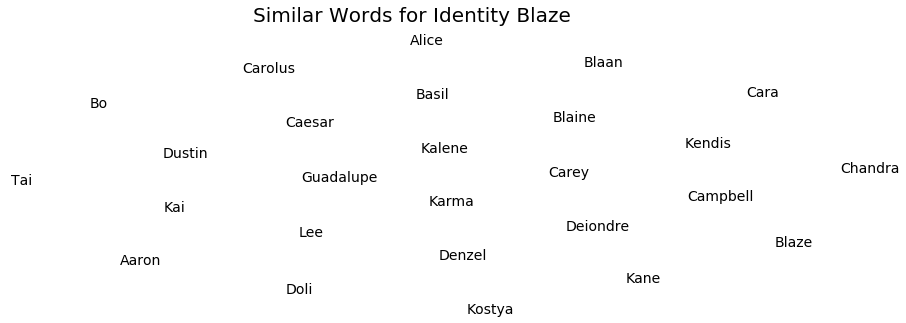

In [ ]:
display_closestwords_tsnescatterplot(model2, 64,'Blaze',25) 

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
#import dataset
from google.colab import files 
  
  
uploaded = files.upload()

Saving names_data.csv to names_data.csv


In [ ]:
import pandas as pd 
import io 
  
dataset = pd.read_csv(io.BytesIO(uploaded['names_data.csv']),encoding='unicode_escape') 
dataset

,names,nationality
0,Gershon,yiddish
1,Lantz,yiddish
2,Zaide,yiddish
3,Zalman,yiddish
4,Zindel,yiddish
...,...,...
3885,Vidura,Thai
3886,Waan,Thai
3887,Waen,Thai
3888,Yod Rak,Thai


In [ ]:
  len(dataset['names'].unique())
  len(dataset['nationality'].unique())

63

In [ ]:
X=dataset['names']
Y=dataset['nationality']


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X= labelencoder_X_1.fit_transform(X)


In [ ]:
#Lets try Neural Network


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import All the packages we need

In [ ]:
from sklearn.model_selection import train_test_split

## Importing Dataset

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving names_data.csv to names_data (1).csv


In [ ]:
import io
data_frame = pd.read_csv(io.BytesIO(uploaded['names_data.csv']),encoding = 'unicode_escape') 
print(data_frame)


         names nationality
0      Gershon     yiddish
1        Lantz     yiddish
2        Zaide     yiddish
3       Zalman     yiddish
4       Zindel     yiddish
...        ...         ...
3885    Vidura        Thai
3886      Waan        Thai
3887      Waen        Thai
3888   Yod Rak        Thai
3889  Yuthakon        Thai

[3890 rows x 2 columns]


Removing those classes having less than 80 samples and samples having English Name

In [ ]:
import string
def isEnglish(Name):
    for s in Name.lower():
        if s not in string.ascii_lowercase:
            return False 
    return True

In [ ]:
tabulist = [n for n in data_frame['names'] if not isEnglish(n)]
data_frame = data_frame[~data_frame['names'].isin(tabulist)]

In [ ]:
nations = data_frame['nationality'].unique()
tabulist = [n for n in nations if len(data_frame[data_frame['nationality']==n]) < 80]
data_frame = data_frame[~data_frame['nationality'].isin(tabulist)]

In [ ]:
len(data_frame['nationality'].unique())

25

## Shuffle the dataset

In [ ]:
from sklearn.utils import shuffle
data_frame = shuffle(data_frame)
data_frame


,names,nationality
699,Harlem,american
1334,Edith,old-english
535,Aneko,japanese
3003,Atul,hindi
916,Bates,greek
...,...,...
974,Basalt,greek
491,Eryu,japanese
1987,Bramwell,english
3449,Abel,Filipino


## Features selections

In [ ]:
Xfeatures=data_frame['names']
Xfeatures = [" ".join(x.lower()) for x in Xfeatures]
Y = data_frame['nationality']
Yall = list(Y.unique())
YLabels = [Yall.index(y) for y in Y]

## Spliting Dataset

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,YLabels,test_size=0.30,random_state=42)

Importing Keras, Gensim

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint
import keras
from gensim.models import Word2Vec
import numpy as np
from keras import backend as K
import tensorflow as tf

In [ ]:
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer
def max_length(lines):
    return max(len(line.split()) for line in lines)

In [ ]:
tokenizer = create_tokenizer(Xfeatures)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

27

In [ ]:
length = max_length(Xfeatures)
length

12

In [ ]:
from keras.preprocessing.text import one_hot
train_encoded_words = [one_hot(d, vocab_size) for d in x_train]
test_encoded_words = [one_hot(d, vocab_size) for d in x_test]

In [ ]:
train_padded_words = pad_sequences(train_encoded_words, maxlen=length, padding='post')
test_padded_words = pad_sequences(test_encoded_words, maxlen=length, padding='post')

In [ ]:
train_labels = np.zeros((len(y_train),len(Yall)))
test_labels = np.zeros((len(y_test),len(Yall)))

for i in range(train_labels.shape[0]):
  train_labels[i][y_train[i]] = 1

for i in range(test_labels.shape[0]):
  test_labels[i][y_test[i]] = 1

In [ ]:
from keras.layers.core import Dropout,Flatten
from keras.optimizers import Adam
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=length))
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(24, activation='relu'))
#model.add(Dropout(0.5)) #Dropout is decreasing accuracy
model.add(Dense(32, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Flatten())
model.add(Dense(25, activation='sigmoid'))

# compile the model
adam = Adam(lr=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 12, 8)             216       
_________________________________________________________________
dense_50 (Dense)             (None, 12, 16)            144       
_________________________________________________________________
dense_51 (Dense)             (None, 12, 24)            408       
_________________________________________________________________
dense_52 (Dense)             (None, 12, 32)            800       
_________________________________________________________________
dense_53 (Dense)             (None, 12, 24)            792       
_________________________________________________________________
dense_54 (Dense)             (None, 12, 12)            300       
_________________________________________________________________
dense_55 (Dense)             (None, 12, 8)           

In [ ]:
from keras import callbacks
best_model_file = 'model.h5'
checkpoint = callbacks.ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
model.fit(train_padded_words, train_labels, batch_size = 6, epochs=100, validation_data=(test_padded_words, test_labels), callbacks=[checkpoint],verbose=1) 

In [ ]:
model3 = Sequential()
model3.add(Embedding(vocab_size, 8, input_length=length))
model3.add(Dense(3, input_dim=8, activation='relu'))
model3.add(Dense(3, activation='relu'))
#model3.add(Dropout(0.5)) #Dropout is decreasing accuracy
model3.add(Dense(4, activation='relu'))

model3.add(Flatten())
model3.add(Dense(25, activation='sigmoid'))

# compile the model
adam = Adam(lr=0.001)
model3.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# summarize the model
print(model3.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 12, 8)             216       
_________________________________________________________________
dense_36 (Dense)             (None, 12, 3)             27        
_________________________________________________________________
dense_37 (Dense)             (None, 12, 3)             12        
_________________________________________________________________
dense_38 (Dense)             (None, 12, 4)             16        
_________________________________________________________________
flatten_8 (Flatten)          (None, 48)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 25)                1225      
Total params: 1,496
Trainable params: 1,496
Non-trainable params: 0
____________________________________________________

In [ ]:
from keras import callbacks
best_model_file = 'model.h5'
checkpoint = callbacks.ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
model3.fit(train_padded_words, train_labels, batch_size = 6, epochs=100, validation_data=(test_padded_words, test_labels), callbacks=[checkpoint],verbose=1) 

# Using matrix of dimension 26 as input

In [ ]:
import string
Xfeatures=data_frame['names']
Xfeatures = [x.lower() for x in Xfeatures] #converting all letters to lowercase
Y = data_frame['nationality']
Yall = list(Y.unique())
YLabels = [Yall.index(y) for y in Y]
len(data_frame['nationality'].unique())

25

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,YLabels,test_size=0.30,random_state=42)

In [ ]:
train_labels = np.zeros((len(y_train),len(Yall)))
test_labels = np.zeros((len(y_test),len(Yall)))

for i in range(train_labels.shape[0]):
  train_labels[i][y_train[i]] = 1

for i in range(test_labels.shape[0]):
  test_labels[i][y_test[i]] = 1

In [ ]:
allleters = string.ascii_lowercase
len(allleters)

26

In [ ]:
train_feature = np.zeros((len(x_train),len(allleters)))
test_feature = np.zeros((len(x_test),len(allleters)))
for i in range(train_feature.shape[0]):
  for j in x_train[i]:
    train_feature[i][allleters.index(j)] += 1

for i in range(test_feature.shape[0]):
  for j in x_test[i]:
    train_feature[i][allleters.index(j)] += 1

In [ ]:
model2 = Sequential()
model2.add(Embedding(26, 8, input_length=26))
model2.add(Dense(12, input_dim=8, activation='relu'))
model2.add(Dense(24, activation='relu'))
#model.add(Dropout(0.5)) #Dropout is decreasing accuracy
model2.add(Dense(12, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Flatten())
model2.add(Dense(25, activation='sigmoid'))

# compile the model
adam = Adam(lr=0.001)
model2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# summarize the model
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 26, 8)             208       
_________________________________________________________________
dense_9 (Dense)              (None, 26, 12)            108       
_________________________________________________________________
dense_10 (Dense)             (None, 26, 24)            312       
_________________________________________________________________
dense_11 (Dense)             (None, 26, 12)            300       
_________________________________________________________________
dense_12 (Dense)             (None, 26, 8)             104       
_________________________________________________________________
flatten_2 (Flatten)          (None, 208)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 25)               

In [ ]:

best_model_file2 = 'model2.h5'
checkpoint2 = callbacks.ModelCheckpoint(best_model_file2, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
model2.fit(train_feature, train_labels, batch_size = 6, epochs=100, validation_data=(test_feature, test_labels), callbacks=[checkpoint2],verbose=1) 

In [ ]:
# Draw model

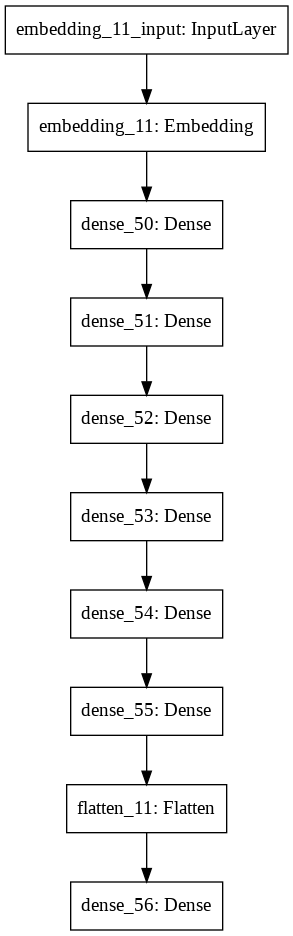

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')